## Complete Case Analysis (CCA)
<mark>This technique is not used that often because of many reasons, one of the most crucial reason is <i>When using our models in production, hte model will not know how to handle with the missing data.</i> </mark>
<br>
<br>
**Where do we use it :**
* Your data is missing completly at random. <mark>(MCAR)</mark>
* Generally if the missing data is less than 5% in that column.
<br>
<br>
> Syntax : df.dropna()

## Univeriate Imputation
#### Advantages
- **Simple to implement**: Univariate imputation is a straightforward method that can be easily implemented in most programming languages.  
- **Fast computation**: Univariate imputation is computationally efficient and can handle large datasets quickly.  
- **Easy to interpret**: The results of univariate imputation are easy to understand and interpret.  

#### Disadvantages  
- **Assumes independence**: Univariate imputation assumes that the missing values are independent of the other variables, which may not always be the case.  
- **Ignores relationships**: Univariate imputation ignores the relationships between variables, which can lead to biased estimates.  
- **May not handle non-normal data**: Univariate imputation assumes normality of the data, which may not be true for all datasets.  
- **Can lead to over-imputation**: Univariate imputation can lead to over-imputation, where the same value is imputed for multiple missing values.  

In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer    
from sklearn.compose import ColumnTransformer  

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv')

In [24]:
df.isnull().mean() * 100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [25]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

trf1 = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
],remainder='passthrough')

X_train_transformed = trf1.fit_transform(X_train)
X_test_transformed = trf1.transform(X_test)

# Make DataFrame from transformed data
transformed_df = pd.DataFrame(X_train_transformed, columns=['Age', 'Fare', 'Family'])
trained_df = pd.DataFrame(X_train, columns=['Age', 'Fare', 'Family'])



In [27]:
trained_df.head()

,Age,Fare,Family
331,45.5,28.5000,0
733,23.0,13.0000,0
382,32.0,7.9250,0
704,26.0,7.8542,1
813,6.0,31.2750,6


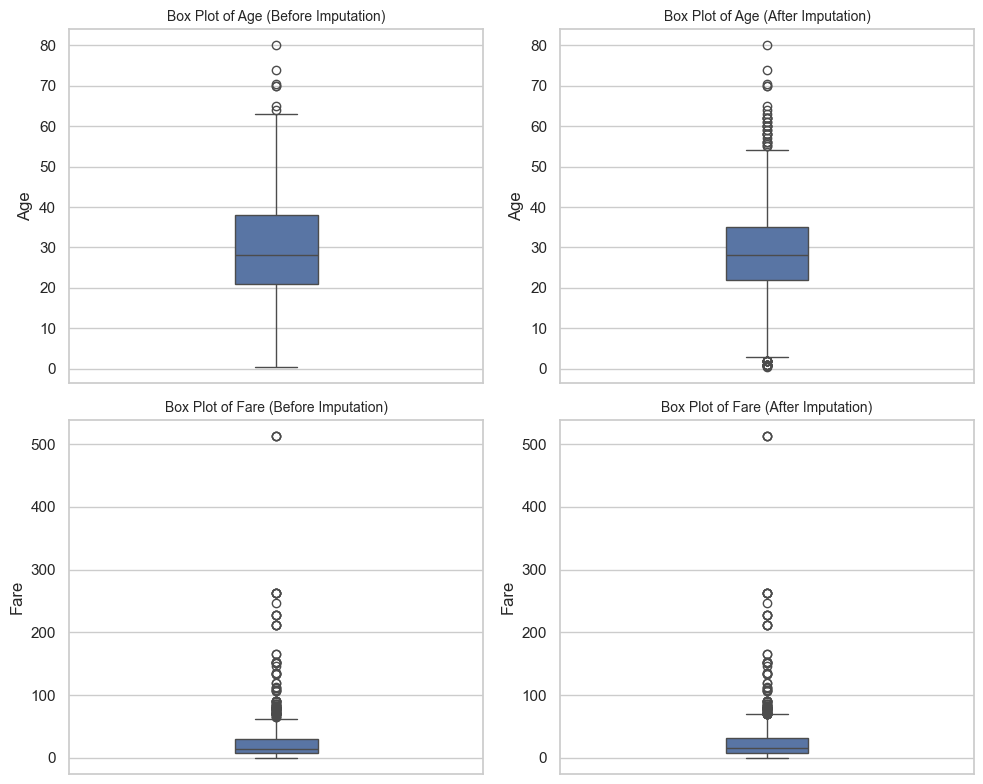

In [44]:
sns.set(style="whitegrid")

# Create a figure with four subplots (2 rows, 2 columns)
plt.figure(figsize=(10, 8))  # Adjusted figure size for 4 plots

# First subplot: Age before imputation
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first plot
sns.boxplot(data=trained_df, y='Age', width=0.2)
plt.title('Box Plot of Age (Before Imputation)', fontsize=10)

# Second subplot: Age after imputation
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second plot
sns.boxplot(data=transformed_df, y='Age', width=0.2)
plt.title('Box Plot of Age (After Imputation)', fontsize=10)

# Third subplot: Fare before imputation
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third plot
sns.boxplot(data=trained_df, y='Fare', width=0.2)
plt.title('Box Plot of Fare (Before Imputation)', fontsize=10)

# Fourth subplot: Fare after imputation
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth plot
sns.boxplot(data=transformed_df, y='Fare', width=0.2)
plt.title('Box Plot of Fare (After Imputation)', fontsize=10)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## Most Frequent Value Imputation (Mode) For Categorical Data  

#### <mark>Assumptions</mark>
* Your Data Should Be MCAR
* The Mode value should be much more frequent than the rest values. 

If the mode is less than 10% from other values then you can create a new category named <mark>Missing</mark>.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day37-handling-missing-categorical-data/train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

* Garagequali ---> Mode, Value_count, 
* Fireplace_quali ---> Value_count, Mode, PDF Curve, 

In [4]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [17]:
new_df = df.copy()
new_df['GarageQual'].fillna(new_df['GarageQual'].mode()[0], inplace=True)

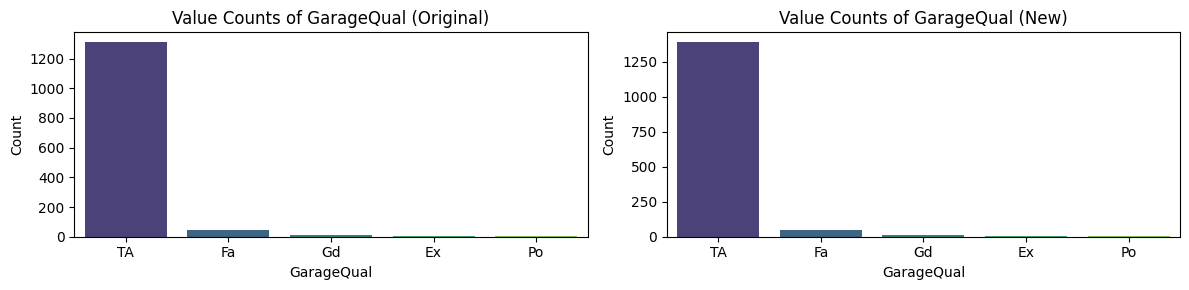

In [24]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Plot the first barplot in the first subplot
sns.barplot(x=df['GarageQual'].value_counts().index, y=df['GarageQual'].value_counts().values, palette='viridis', ax=axs[0])
axs[0].set_title('Value Counts of GarageQual (Original)')
axs[0].set_xlabel('GarageQual')
axs[0].set_ylabel('Count')

# Plot the second barplot in the second subplot
sns.barplot(x=new_df['GarageQual'].value_counts().index, y=new_df['GarageQual'].value_counts().values, palette='viridis', ax=axs[1])
axs[1].set_title('Value Counts of GarageQual (New)')
axs[1].set_xlabel('GarageQual')
axs[1].set_ylabel('Count')

# Layout so plots do not overlap
fig.tight_layout()

plt.show()


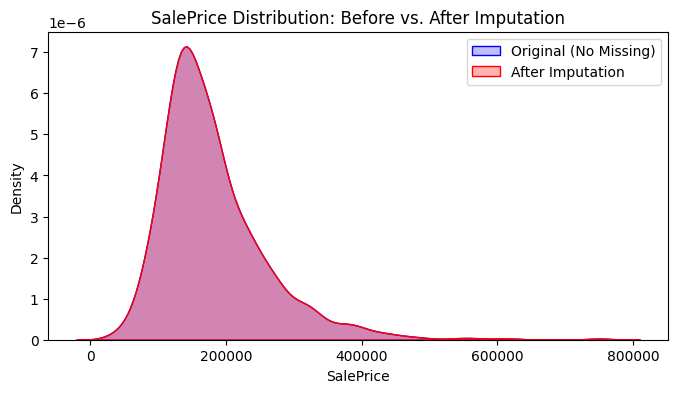

In [31]:
# PDF Curve for sales after and before imputation
plt.figure(figsize=(8, 4))

# Before imputation (missing values excluded)
sns.kdeplot(data=df, x='SalePrice', label='Original (No Missing)', fill=True,  color='blue')

# After imputation (assuming missing GarageQual affects SalePrice)
sns.kdeplot(data=new_df, x='SalePrice', label='After Imputation', fill=True, color='red', alpha=0.3)

plt.title('SalePrice Distribution: Before vs. After Imputation')
plt.legend()
plt.show()
plt.show()

**Key Observations**

### Similar Shapes

Both curves peak around the same price (~$200K), suggesting imputation didn’t drastically alter the overall distribution.

### Minor Differences

* The red curve (after imputation) is slightly taller near the peak, meaning:
	+ More houses now fall into the most common price range after imputation.
	+ This happens because missing GarageQual values were replaced with the mode (TA), which likely correlates with average-priced homes.

### No Major Shifts

* The curves overlap significantly, indicating no severe bias was introduced by imputation.

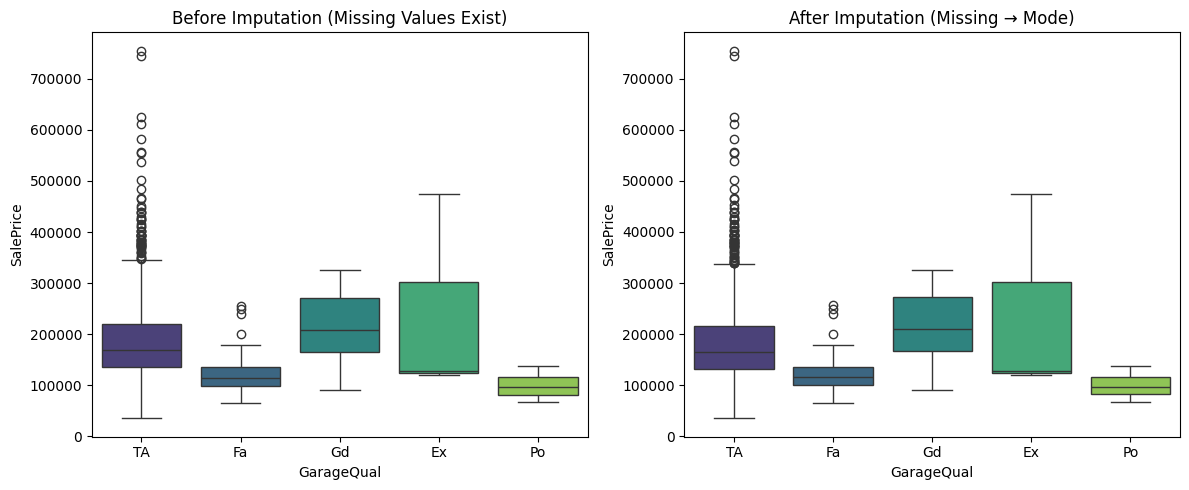

In [28]:
# Box Plot For GarageQual vs SalePrice before and after imputation
plt.figure(figsize=(12, 5))

# Before imputation (missing values as a separate group)
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='GarageQual', y='SalePrice', palette='viridis')
plt.title('Before Imputation (Missing Values Exist)')

# After imputation (missing values replaced)
plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x='GarageQual', y='SalePrice', palette='viridis')
plt.title('After Imputation (Missing → Mode)')

plt.tight_layout()
plt.show()